In [38]:
from tensorflow import keras

# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=88584)

print(x_train.shape)
print(x_test.shape)

# restore np.load for future normal usage
np.load = np_load_old
del(np_load_old)


word_index = keras.datasets.imdb.get_word_index()

print('preprocessing...')
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=256)

(25000,)
(25000,)
preprocessing...


In [39]:
def get_model():
    print('build model')
    model = keras.Sequential()
    model.add(keras.layers.Embedding(88584, 16))
    model.add(keras.layers.LSTM(100))
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
    
def plot_train_acc(history):
    plt.plot(history.history['acc'])

    plt.title('train accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training accuracy'], loc='upper left')
    plt.show()

def plot_val_acc(val_scores):
    plt.plot(val_scores)

    plt.title('val accuracy')
    plt.ylabel('scores')
    plt.xlabel('k folds')
    plt.legend(['validation scores'], loc='upper left')
    plt.show()
    
# K-Fold Validation
def k_fold(epoch, k):
    num_validation_samples = len(x_train) // k
    # np.random.shuffle(x_train, y_train)
    validation_scores = []

    for fold in range(k):
        print(fold, " fold....")
        
        x_val = x_train[num_validation_samples * fold:num_validation_samples * (fold + 1)]
        y_val = y_train[num_validation_samples * fold:num_validation_samples * (fold + 1)]

        x_train_set = np.concatenate([x_train[:num_validation_samples * fold], x_train[num_validation_samples * (fold + 1):]])   
        y_train_set = np.concatenate([y_train[:num_validation_samples * fold], y_train[num_validation_samples * (fold + 1):]])

        model = get_model()
        history = model.fit(x_train_set,
                      y_train_set,
                      epochs=epoch,
                      verbose=1)
        
        plot_train_acc(history)
        
        validation_score = model.evaluate(x_val, y_val)
        validation_scores.append(validation_score)
        
        plot_val_acc(validation_scores)

    validation_score = np.average(validation_scores)
    return validation_score

0  fold....
build model
Epoch 1/5
20000/20000 [==============================] - 411s 21ms/sample - loss: 0.4717 - acc: 0.7676
Epoch 2/5
20000/20000 [==============================] - 409s 20ms/sample - loss: 0.2449 - acc: 0.9079
Epoch 3/5
20000/20000 [==============================] - 413s 21ms/sample - loss: 0.1494 - acc: 0.9463
Epoch 4/5
20000/20000 [==============================] - 418s 21ms/sample - loss: 0.0808 - acc: 0.9732
Epoch 5/5
20000/20000 [==============================] - 412s 21ms/sample - loss: 0.0581 - acc: 0.9819


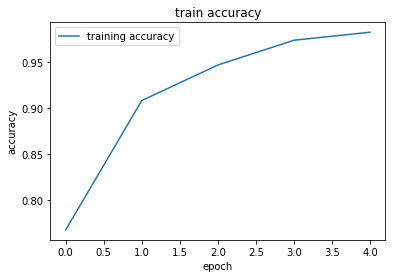

5000/5000 [==============================] - 12s 2ms/sample - loss: 0.4905 - acc: 0.8564


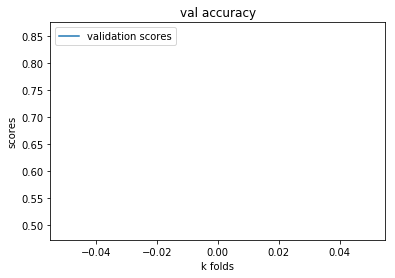

1  fold....
build model
Epoch 1/5
20000/20000 [==============================] - 405s 20ms/sample - loss: 0.5366 - acc: 0.7126
Epoch 2/5
20000/20000 [==============================] - 401s 20ms/sample - loss: 0.2360 - acc: 0.9089
Epoch 3/5
20000/20000 [==============================] - 410s 21ms/sample - loss: 0.1289 - acc: 0.9574
Epoch 4/5
20000/20000 [==============================] - 396s 20ms/sample - loss: 0.0754 - acc: 0.9740
Epoch 5/5
20000/20000 [==============================] - 389s 19ms/sample - loss: 0.0635 - acc: 0.9793


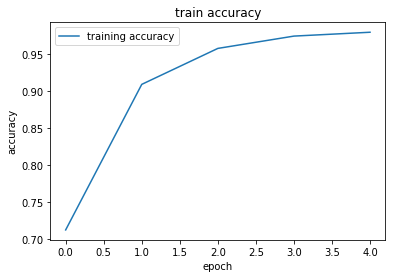

5000/5000 [==============================] - 12s 2ms/sample - loss: 0.4769 - acc: 0.8626


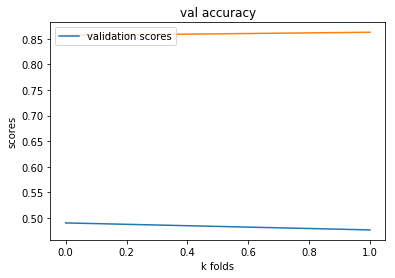

2  fold....
build model
Epoch 1/5
20000/20000 [==============================] - 410s 20ms/sample - loss: 0.4710 - acc: 0.7590
Epoch 2/5
20000/20000 [==============================] - 539s 27ms/sample - loss: 0.2465 - acc: 0.9054
Epoch 3/5
20000/20000 [==============================] - 417s 21ms/sample - loss: 0.1211 - acc: 0.9581
Epoch 4/5
20000/20000 [==============================] - 420s 21ms/sample - loss: 0.0670 - acc: 0.9780
Epoch 5/5
20000/20000 [==============================] - 419s 21ms/sample - loss: 0.0497 - acc: 0.9847


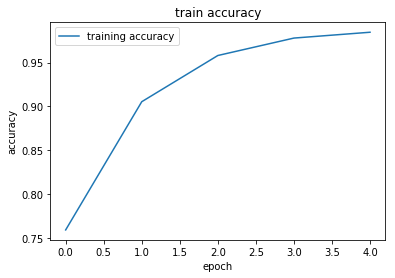

5000/5000 [==============================] - 12s 2ms/sample - loss: 0.5056 - acc: 0.8662


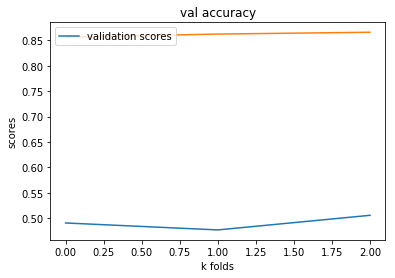

3  fold....
build model
Epoch 1/5
20000/20000 [==============================] - 449s 22ms/sample - loss: 0.4714 - acc: 0.7613
Epoch 2/5
20000/20000 [==============================] - 466s 23ms/sample - loss: 0.2342 - acc: 0.9103
Epoch 3/5
20000/20000 [==============================] - 460s 23ms/sample - loss: 0.1261 - acc: 0.9567
Epoch 4/5
20000/20000 [==============================] - 480s 24ms/sample - loss: 0.0744 - acc: 0.9768
Epoch 5/5
20000/20000 [==============================] - 496s 25ms/sample - loss: 0.0461 - acc: 0.9852


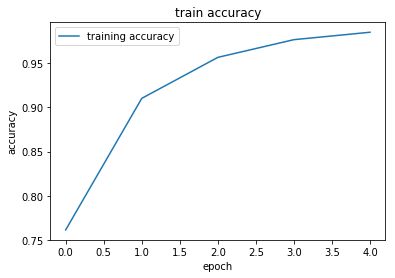

5000/5000 [==============================] - 14s 3ms/sample - loss: 0.4526 - acc: 0.8458


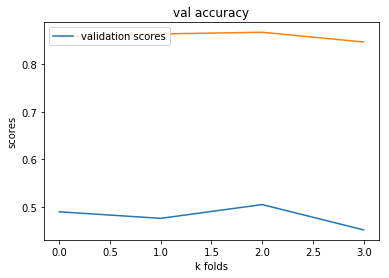

4  fold....
build model
Epoch 1/5
20000/20000 [==============================] - 483s 24ms/sample - loss: 0.4470 - acc: 0.7818
Epoch 2/5
20000/20000 [==============================] - 451s 23ms/sample - loss: 0.2173 - acc: 0.9186
Epoch 3/5
20000/20000 [==============================] - 444s 22ms/sample - loss: 0.1224 - acc: 0.9575
Epoch 4/5
20000/20000 [==============================] - 446s 22ms/sample - loss: 0.0738 - acc: 0.9754
Epoch 5/5
20000/20000 [==============================] - 21816s 1s/sample - loss: 0.0427 - acc: 0.9866


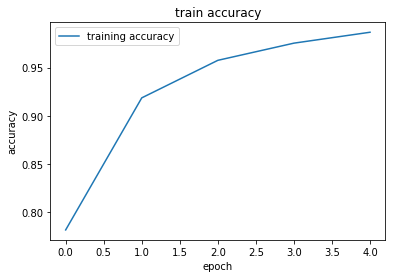

5000/5000 [==============================] - 13s 3ms/sample - loss: 0.5675 - acc: 0.7962


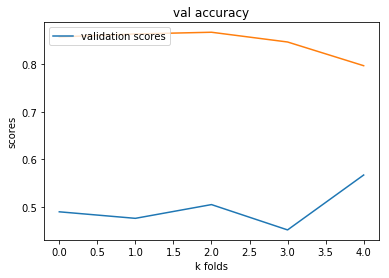

0.6720304839146137
build model
Epoch 1/5
18750/18750 [==============================] - 429s 23ms/sample - loss: 0.4852 - acc: 0.7607
Epoch 2/5
18750/18750 [==============================] - 448s 24ms/sample - loss: 0.2738 - acc: 0.8917
Epoch 3/5
18750/18750 [==============================] - 461s 25ms/sample - loss: 0.1366 - acc: 0.9529
Epoch 4/5
18750/18750 [==============================] - 472s 25ms/sample - loss: 0.0693 - acc: 0.9791
Epoch 5/5
25000/25000 [==============================] - 85s 3ms/sample - loss: 0.5122 - acc: 0.8310
Loss: 0.5121886078882217 Accuracy: 0.831


In [43]:
score = k_fold(5, 5)
print(score)

# p = 3
# p_scores = []

# #Iterated K-Fold Validation
# for i in range(p):
#     print(i, " step iteration....")
#     # K-Fold Validation
#     score = k_fold(5)
#     p_scores.append(score)

# p_scores = np.average(p_scores)

model = get_model()

# train on all sets after k-fold validation -- (train + validation set)
model.fit(x_train_set, y_train_set, epochs=5, verbose=1)
test_score = model.evaluate(x_test, y_test)
print('Loss:', test_score[0], 'Accuracy:', test_score[1])

In [11]:
import h5py
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("models/model_kfv.json", "w") as json_file:
    json_file.write(model_json)

print('save trained model...')
model.save('models/sentiment_keras_kfv.h5')
# # del(model)

# serialize weights to HDF5
model.save_weights("models/model_kfv.h5")

save trained model...


In [ ]:
# load json and create model
json_file = open("models/model_kfv.json", "r")
load_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(load_model_json)
# load weights into new model
loaded_model.load_weights("models/model_kfv.h5")

print('load model...')
_model_ = load_model('models/sentiment_keras_kfv.h5')

In [46]:
from keras.preprocessing.sequence import pad_sequences
sample = 'I hate been here, this place is terrible'
# sample = "I love this moment, you're so awesome"
sample_label = 0
# convert input sentence to tokens based on word_index
inps = [word_index[word] for word in sample.split() if word in word_index]
# the sentence length should be the same as the input sentences
inps = pad_sequences([inps], maxlen=256)

In [47]:
print('Accuracy:', model.evaluate(inps, [sample_label], batch_size=1)[1])
print('Sentiment score: {}'.format(model.predict(inps)[0][0]))

1/1 [==============================] - 0s 40ms/sample - loss: 0.8807 - acc: 0.0000e+00
Accuracy: 0.0
Sentiment score: 0.5855152010917664
